In [109]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd 
import random
import cv2

In [0]:
np.random.seed(0)

In [112]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)

print(type(train_data))

x_train, y_train = train_data['features'], train_data['labels']
x_test, y_test = test_data['features'], test_data['labels']
x_val, y_val = val_data['features'], val_data['labels']

<class 'dict'>


In [113]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [0]:
assert(x_train.shape[0 == y_train.shape[0]]), "The Number Of Images Is NOt Equal To The Number Of Labels"
assert(x_test.shape[0 == y_test.shape[0]]), "The Number Of Images Is NOt Equal To The Number Of Labels"
assert(x_val.shape[0 == y_val.shape[0]]), "The Number Of Images Is NOt Equal To The Number Of Labels"
assert(x_train.shape[1:]==(32,32,3)), "The Dimension OF The Image Are Not 32 x 32 x 3"
assert(x_test.shape[1:]==(32,32,3)), "The Dimension OF The Image Are Not 32 x 32 x 3"
assert(x_val.shape[1:]==(32,32,3)), "The Dimension OF The Image Are Not 32 x 32 x 3"

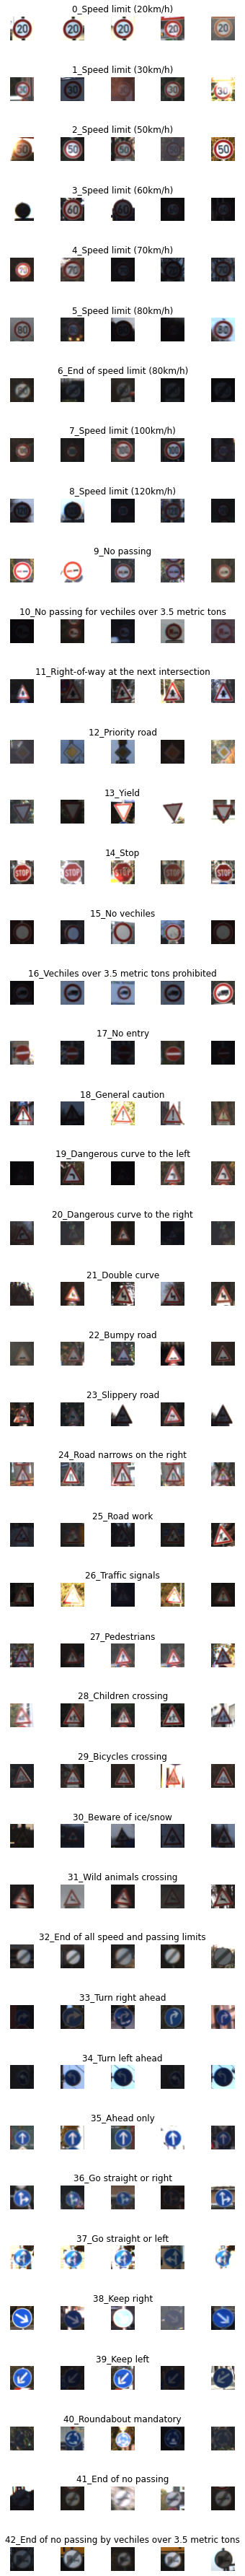

In [115]:
data  = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row  in  data.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "_" + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

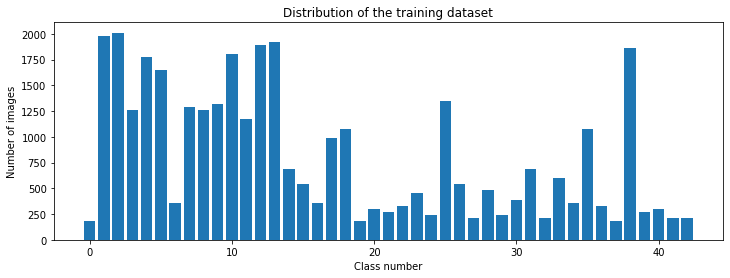

In [116]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)


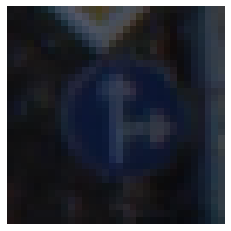

In [117]:
 import cv2

 plt.imshow(x_train[1000])
 plt.axis("off")
 print(x_train[1000].shape)

(32, 32)


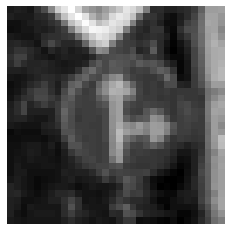

In [118]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(x_train[1000])
plt.imshow(img, cmap="gray")
plt.axis("off")
print(img.shape)

(32, 32)


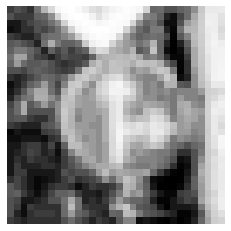

In [119]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img,cmap="gray")
plt.axis("off")
print(img.shape)

In [0]:
def preprocessing(img):
  img  = grayscale(img)
  img  = equalize(img)
  img  = img/255  #normalization
  return img 

x_train = np.array(list(map(preprocessing, x_train)))
x_test = np.array(list(map(preprocessing, x_test)))
x_val = np.array(list(map(preprocessing, x_val)))

(34799, 32, 32)


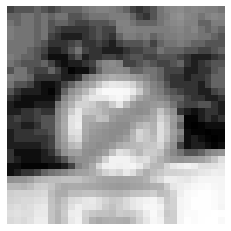

In [121]:
plt.imshow(x_train[random.randint(0,len(x_train) -1)],cmap="gray")
plt.axis("off")
print(x_train.shape)

In [0]:
x_train = x_train.reshape(34799, 32, 32, 1)
x_test = x_test.reshape(12630, 32, 32, 1)
x_val = x_val.reshape(4410, 32, 32, 1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(x_train)

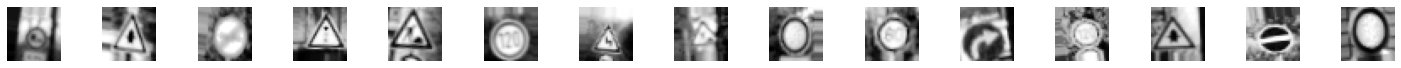

In [124]:
batches = datagen.flow(x_train, y_train, batch_size = 20)
x_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(x_batch[i].reshape(32, 32), cmap="gray")
    axs[i].axis("off")


In [125]:
print(x_batch.shape)

(20, 32, 32, 1)


In [126]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [0]:
def le_Net_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5),  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dropout(0.5))


  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [129]:
model = le_Net_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 480)              

In [130]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 50), steps_per_epoch = 2000, epochs = 10, validation_data = (x_val, y_val),  shuffle = 1)


Epoch 1/10
2000/2000 [==============================] - 55s 27ms/step - loss: 0.8782 - accuracy: 0.7447 - val_loss: 0.0756 - val_accuracy: 0.9762
Epoch 2/10
2000/2000 [==============================] - 55s 27ms/step - loss: 0.2142 - accuracy: 0.9331 - val_loss: 0.0677 - val_accuracy: 0.9805
Epoch 3/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1407 - accuracy: 0.9565 - val_loss: 0.0709 - val_accuracy: 0.9871
Epoch 4/10
2000/2000 [==============================] - 53s 27ms/step - loss: 0.1104 - accuracy: 0.9662 - val_loss: 0.0355 - val_accuracy: 0.9889
Epoch 5/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.0923 - accuracy: 0.9714 - val_loss: 0.0429 - val_accuracy: 0.9878
Epoch 6/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.0815 - accuracy: 0.9747 - val_loss: 0.0376 - val_accuracy: 0.9900
Epoch 7/10
2000/2000 [==============================] - 55s 27ms/step - loss: 0.0710 - accuracy: 0.9786 - val_loss: 0.0239 -

Text(0.5, 0, 'epoch')

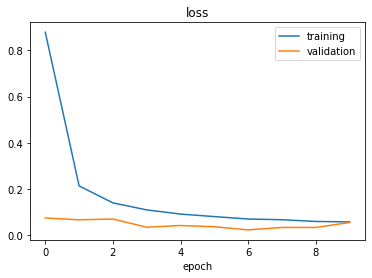

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

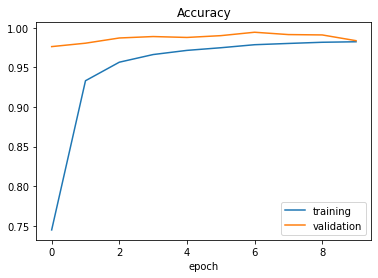

In [132]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [133]:
 score  = model.evaluate(x_test , y_test, verbose= 0)
 print('Test Score = ', score[0])
 print('Test Accuracy = ', score[1])

Test Score =  0.18007704615592957
Test Accuracy =  0.9606492519378662


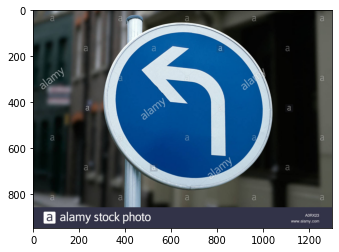

In [134]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


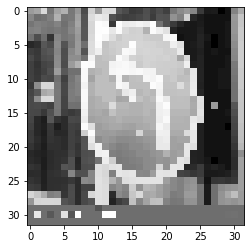

In [135]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
img = img.reshape(1, 32, 32, 1)

In [137]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [34]
